In [19]:
import numpy as np

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

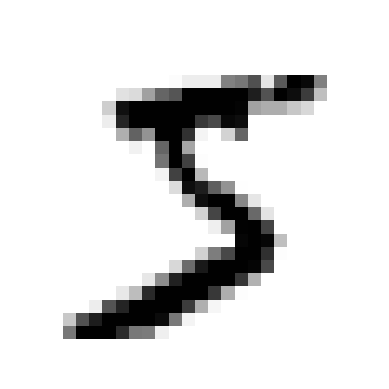

In [17]:
import matplotlib.pyplot as plt

some_digit = X.loc[0].values
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [18]:
y[0]

'5'

In [20]:
y = y.astype(np.uint8)

In [21]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Binary classifier (5-detector)

In [22]:
y_train_5 = y_train == 5
y_test_5 = y_test == 5

In [23]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [24]:
sgd_clf.predict([some_digit])

/Users/peter/Documents/hands-on-ml/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [25]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

### Confusion matrix

In [27]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False], shape=(60000,))

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [29]:
from sklearn.metrics import precision_score, recall_score

(precision_score(y_train_5, y_train_pred), recall_score(y_train_5, y_train_pred))

(0.8370879772350012, 0.6511713705958311)

In [30]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343847

### Precision-recall trade-off

In [31]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [32]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

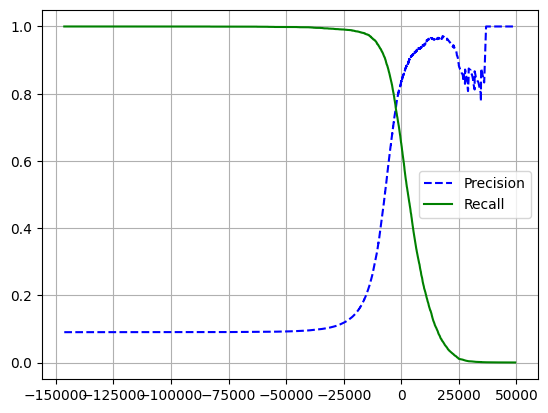

In [37]:
def plot_precision(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.legend(loc="best")
    plt.grid(True)

plot_precision(precisions, recalls, thresholds)

/var/folders/7p/zqwcy3w17072r8dpmkt69pp80000gn/T/ipykernel_12424/3069769536.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best")


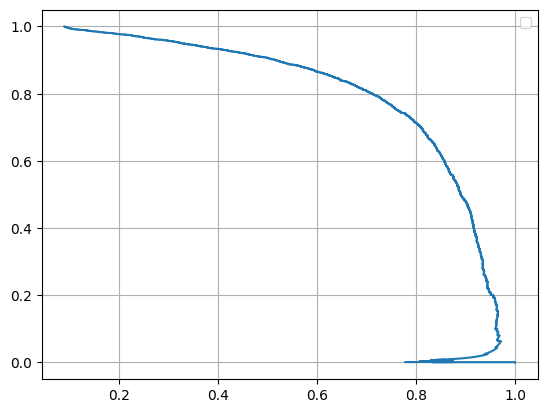

In [38]:
def plot_precision_against_recall(precisions, recalls):
    plt.plot(precisions, recalls)
    plt.legend(loc="best")
    plt.grid(True)

plot_precision_against_recall(precisions, recalls)

In [40]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

np.float64(3370.0194991441826)

In [41]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
(precision_score(y_train_5, y_train_pred_90), recall_score(y_train_5, y_train_pred_90))

(0.9000345901072293, 0.4799852425751706)